## Data download and split

In [1]:
from credit_risk_analysis import dataset

dataset.main()

2025-06-28 22:28:25.477 | INFO     | credit_risk_analysis.config:<module>:11 - PROJ_ROOT path is: C:\Users\andre\iCloudDrive\Documents_Backup\Digital_Bullet_Journal\Education\Data Science\Anyone AI\5. Final_Project\credit_risk_analysis


2025-06-28 22:28:28.801 | INFO     | credit_risk_analysis.dataset:main:116 - Downloading dataset from S3...
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
Download complete.
2025-06-28 22:28:52.628 | INFO     | credit_risk_analysis.dataset:load_dataset_with_colnames:63 - Loading variables list...
2025-06-28 22:28:52.646 | INFO     | credit_risk_analysis.dataset:load_dataset_with_colnames:65 - Variables list loaded successfully.
Number of variables: 53
2025-06-28 22:28:53.227 | INFO     | credit_risk_analysis.dataset:main:120 - Dataset loaded successfully.
X_train: (40000, 53)
X_val: (10000, 53)
y_train: (40000,)
y_val: (10000,)
Datos guardados en data/interim/
2025-06-28 22:28:54.420 | SUCCESS  | credit_risk_analysis.dataset:main:143 - Dataset downloaded successfully.


## Exploratory Data Analysis - EDA

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from credit_risk_analysis.config import RAW_DATA_DIR
from credit_risk_analysis.dataset import load_variables_list
from credit_risk_analysis.dataset import load_dataset_with_colnames
from credit_risk_analysis.plots import plot_missing_values, plot_categorical_feature_distribution

pd.set_option('display.max_columns', 500)

In [3]:
load_variables_list(RAW_DATA_DIR)

,Var_Id,Var_Title,Var_Description,Field_Content
0,1,ID_CLIENT,Sequential number for the applicant (to be use...,"1-50000, 50001-70000, 70001-90000"
1,2,CLERK_TYPE,Not informed,C
2,3,PAYMENT_DAY,"Day of the month for bill payment, chosen by t...","1,5,10,15,20,25"
3,4,APPLICATION_SUBMISSION_TYPE,Indicates if the application was submitted via...,"Web, Carga"
4,5,QUANT_ADDITIONAL_CARDS,Quantity of additional cards asked for in the ...,"1,2,NULL"
5,6,POSTAL_ADDRESS_TYPE,Indicates if the address for posting is the ho...,1.2
6,7,SEX,NaN,"M=Male, F=Female"
7,8,MARITAL_STATUS,Encoding not informed,"1,2,3,4,5,6,7"
8,9,QUANT_DEPENDANTS,NaN,"0, 1, 2, ..."
9,10,EDUCATION_LEVEL,Edducational level in gradual order not informed,"1,2,3,4,5"


In [4]:
df = load_dataset_with_colnames(RAW_DATA_DIR)

2025-06-28 22:28:55.633 | INFO     | credit_risk_analysis.dataset:load_dataset_with_colnames:63 - Loading variables list...
2025-06-28 22:28:55.643 | INFO     | credit_risk_analysis.dataset:load_dataset_with_colnames:65 - Variables list loaded successfully.
Number of variables: 53


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_CLIENT                       50000 non-null  int64  
 1   CLERK_TYPE                      50000 non-null  object 
 2   PAYMENT_DAY                     50000 non-null  int64  
 3   APPLICATION_SUBMISSION_TYPE     50000 non-null  object 
 4   QUANT_ADDITIONAL_CARDS          50000 non-null  int64  
 5   POSTAL_ADDRESS_TYPE             50000 non-null  int64  
 6   SEX                             50000 non-null  object 
 7   MARITAL_STATUS                  50000 non-null  int64  
 8   QUANT_DEPENDANTS                50000 non-null  int64  
 9   EDUCATION_LEVEL1                50000 non-null  int64  
 10  STATE_OF_BIRTH                  50000 non-null  object 
 11  CITY_OF_BIRTH                   50000 non-null  object 
 12  NACIONALITY                     

In [6]:
df.head()

,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL1,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


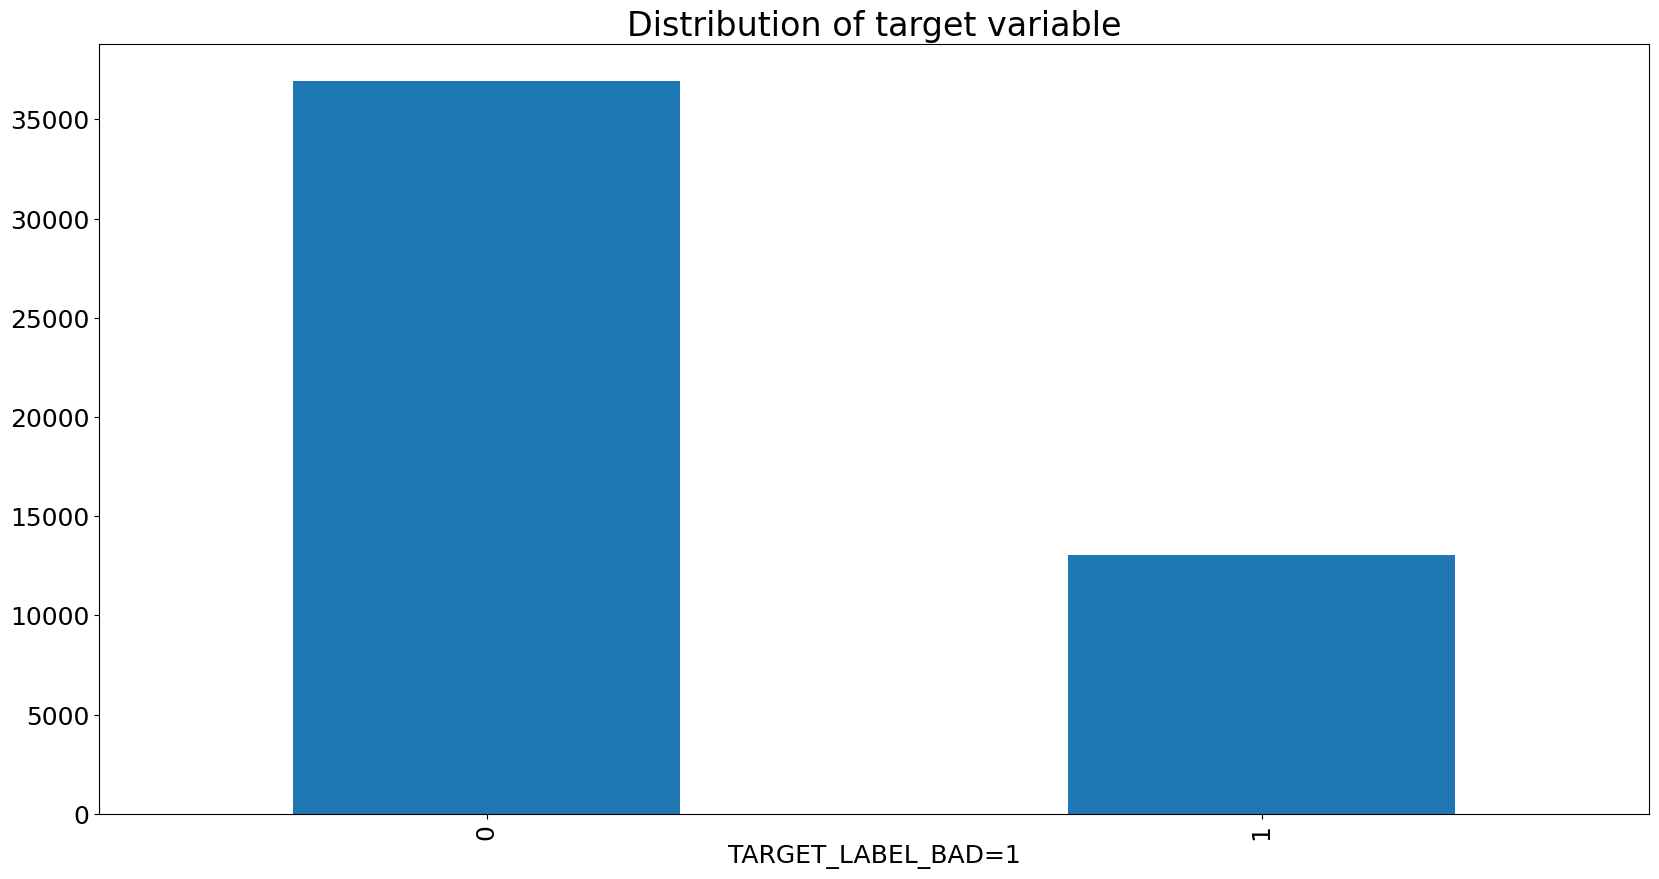

In [7]:
# Plot the distribution of the target variable
ax = df['TARGET_LABEL_BAD=1'].value_counts().plot.bar(
    figsize=(20, 10), 
    legend=False
)
ax.set_title("Distribution of target variable", fontsize=24)
ax.tick_params(axis='x', labelsize=18)
ax.set_xlabel("TARGET_LABEL_BAD=1", fontsize=18)
ax.tick_params(axis='y', labelsize=18)

2025-06-28 22:28:56.709 | INFO     | credit_risk_analysis.plots:plot_missing_values:22 - Plotting missing values
2025-06-28 22:28:56.871 | SUCCESS  | credit_risk_analysis.plots:plot_missing_values:41 - Missing values plot created successfully.


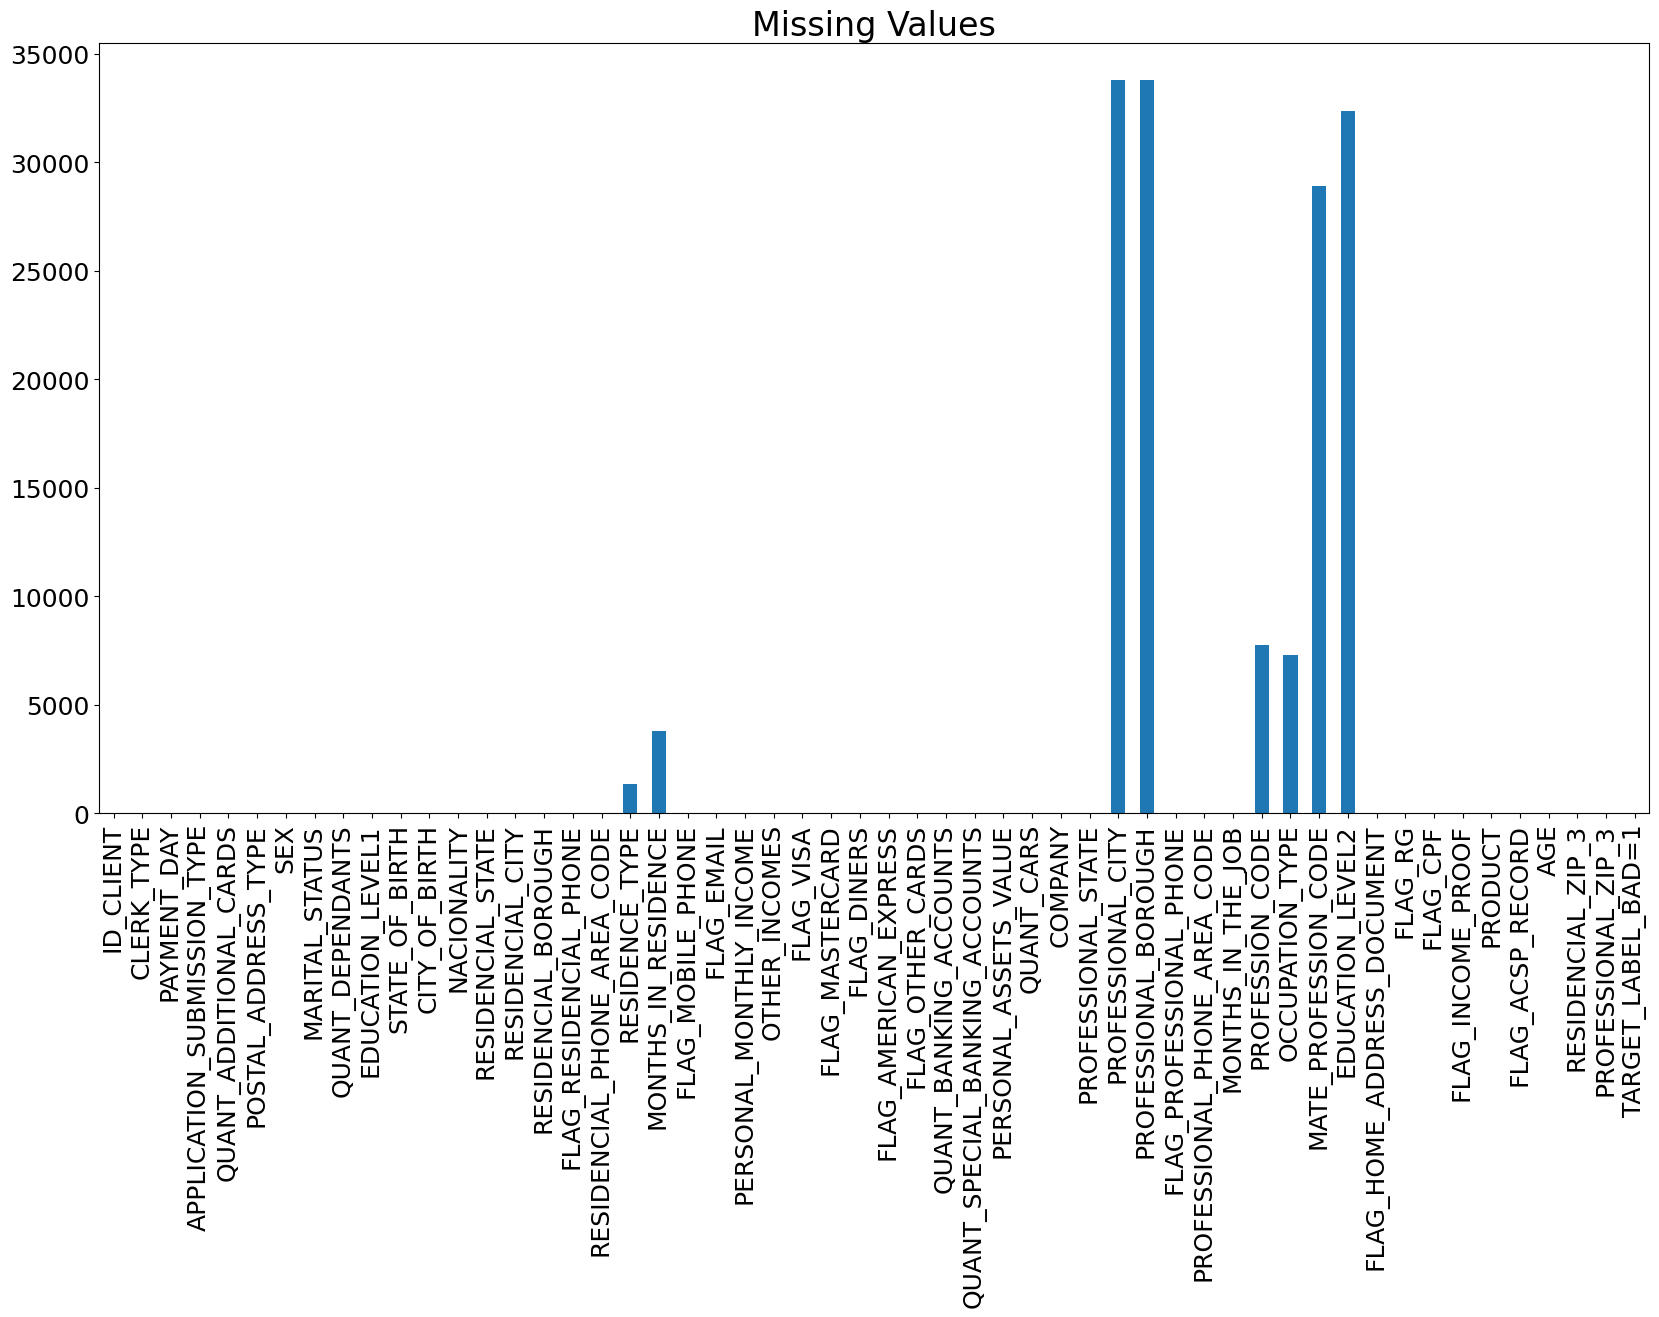

In [8]:
plot_missing_values(df, output_path=os.path.join(RAW_DATA_DIR, "missing_values.png"), save=False)

In [9]:
df.dtypes.value_counts()

int64      25
object     20
float64     9
Name: count, dtype: int64

2025-06-28 22:28:57.650 | INFO     | credit_risk_analysis.plots:plot_categorical_feature_distribution:50 - Plotting categorical feature distribution and saving to C:\Users\andre\iCloudDrive\Documents_Backup\Digital_Bullet_Journal\Education\Data Science\Anyone AI\5. Final_Project\credit_risk_analysis\reports
2025-06-28 22:28:57.666 | INFO     | credit_risk_analysis.plots:plot_categorical_feature_distribution:58 - Categorical columns found: ['CLERK_TYPE', 'APPLICATION_SUBMISSION_TYPE', 'SEX', 'STATE_OF_BIRTH', 'CITY_OF_BIRTH', 'RESIDENCIAL_STATE', 'RESIDENCIAL_CITY', 'RESIDENCIAL_BOROUGH', 'FLAG_RESIDENCIAL_PHONE', 'RESIDENCIAL_PHONE_AREA_CODE', 'FLAG_MOBILE_PHONE', 'COMPANY', 'PROFESSIONAL_STATE', 'PROFESSIONAL_CITY', 'PROFESSIONAL_BOROUGH', 'FLAG_PROFESSIONAL_PHONE', 'PROFESSIONAL_PHONE_AREA_CODE', 'FLAG_ACSP_RECORD', 'RESIDENCIAL_ZIP_3', 'PROFESSIONAL_ZIP_3']
2025-06-28 22:28:57.938 | INFO     | credit_risk_analysis.plots:plot_categorical_feature_distribution:73 - Plotting of individu

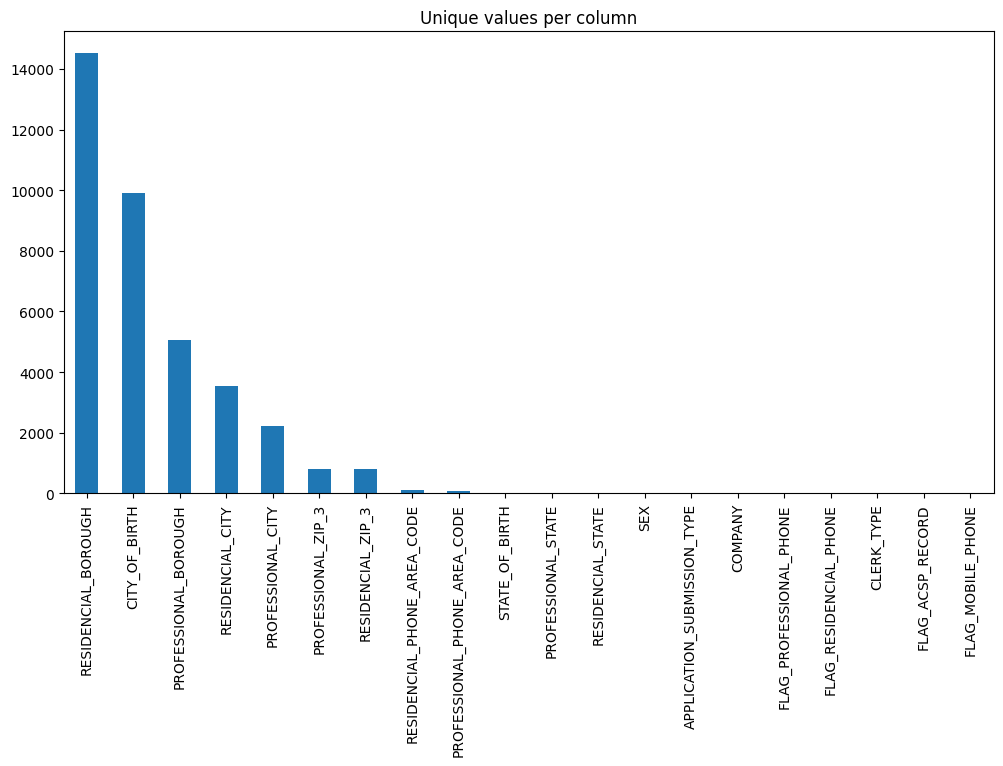

In [10]:
plot_categorical_feature_distribution(df, save=False, plot_each_feature=False)
plt.show()

In [11]:
df.describe()

,ID_CLIENT,PAYMENT_DAY,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL1,NACIONALITY,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL2,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,AGE,TARGET_LABEL_BAD=1
count,50000.000000,50000.000000,50000.0,50000.000000,50000.00000,50000.000000,50000.0,50000.000000,48651.000000,46223.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,42244.000000,42687.000000,21116.000000,17662.000000,50000.0,50000.0,50000.0,50000.0,50000.000000,50000.00000,50000.000000
mean,25000.500000,12.869920,0.0,1.006540,2.14840,0.650520,0.0,0.961600,1.252225,9.727149,0.802280,886.678437,35.434760,0.111440,0.097460,0.001320,0.001740,0.002040,0.357840,0.357840,2.322372e+03,0.336140,0.009320,8.061784,2.484316,3.797926,0.296003,0.0,0.0,0.0,0.0,1.275700,43.24852,0.260820
std,14433.901067,6.608385,0.0,0.080606,1.32285,1.193655,0.0,0.202105,0.867833,10.668841,0.398284,7846.959327,891.515142,0.314679,0.296586,0.036308,0.041677,0.045121,0.479953,0.479953,4.235798e+04,0.472392,0.383453,3.220104,1.532261,5.212168,0.955688,0.0,0.0,0.0,0.0,0.988286,14.98905,0.439086
min,1.000000,1.000000,0.0,1.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,6.00000,0.000000
25%,12500.750000,10.000000,0.0,1.000000,1.00000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,360.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,31.00000,0.000000
50%,25000.500000,10.000000,0.0,1.000000,2.00000,0.000000,0.0,1.000000,1.000000,6.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,9.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,41.00000,0.000000
75%,37500.250000,15.000000,0.0,1.000000,2.00000,1.000000,0.0,1.000000,1.000000,15.000000,1.000000,800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,9.000000,4.000000,11.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,53.00000,1.000000
max,50000.000000,25.000000,0.0,2.000000,7.00000,53.000000,0.0,2.000000,5.000000,228.000000,1.000000,959000.000000,194344.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,6.000000e+06,1.000000,35.000000,18.000000,5.000000,17.000000,5.000000,0.0,0.0,0.0,0.0,7.000000,106.00000,1.000000


<Axes: xlabel='PERSONAL_MONTHLY_INCOME'>

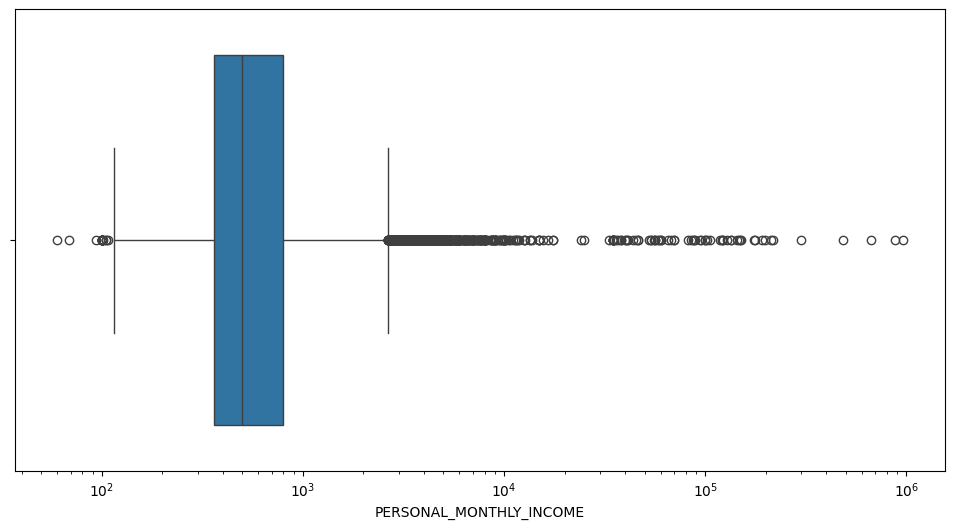

In [13]:
# Plot the distribution of the 'PERSONAL_MONTHLY_INCOME' feature
plt.figure(figsize=(12, 6))
sns.boxplot(df, x='PERSONAL_MONTHLY_INCOME', log_scale=True)

In [15]:
df['PERSONAL_MONTHLY_INCOME'].describe()

count     50000.000000
mean        886.678437
std        7846.959327
min          60.000000
25%         360.000000
50%         500.000000
75%         800.000000
max      959000.000000
Name: PERSONAL_MONTHLY_INCOME, dtype: float64